In [130]:
import time
import random
cap=20_000
max_range = 50_000

class sorted_class():
    def __init__(self):
        self.runtime = 0

    def sort_data(self):
        pass

    def profile_t(self):
        pass

In [131]:
class radix(sorted_class):
   
    def __init__(self):
        super().__init__()  # Inheriting the parent class instance variables           

    # Defining the radix sort method which takes in an unsorted lis_arr and returns the same lis_arr sorted in-place
    def sort_data(self, lis_arr):
      # Write your code here
      t1 = time.perf_counter()
      if not lis_arr:
        return

      max_dig = len(str(max(lis_arr)))
      out = [0]*len(lis_arr)
      i=0

      while i<max_dig:
        count = [0]*10
        start_pos = [0]*10
        for ele in lis_arr:
          count[(ele//(10**i))%10]+=1
            
        for j in range(1, len(start_pos)):
          start_pos[j] = start_pos[j-1]+count[j-1]
        
        for ele in lis_arr:
          ind = (ele//(10**i))%10
          out[start_pos[ind]] = ele
          start_pos[ind]+=1

        lis_arr[:] = out
        i+=1
      
      self.runtime = time.perf_counter() - t1
      return lis_arr

    def profile_t(self):
        return self.runtime

In [132]:
if __name__ == '__main__':
    random.seed(42)
    inp = [random.randrange(1, max_range, 1) for i in range(cap)]
    s0 = radix()

    #print(s0.sort_data(inp))
    print(inp is s0.sort_data(inp))
    print(s0.profile_t())

True
0.049876300035975873


In [133]:
class merge(sorted_class):
   
    def __init__(self):
        super().__init__()  # Inheriting the parent class instance variables           

    # Defining the merge sort method which takes in an unsorted lis_arr and returns the sorted lis_arr 
    def sort_data(self, lis_arr):
      t1 = time.perf_counter()

      if not lis_arr:
        return lis_arr
      arr2 = [0]*len(lis_arr)
      self.rec_merge_sort(lis_arr, 0, len(lis_arr)-1, arr2)
      
      self.runtime = time.perf_counter() - t1
      return lis_arr
    
    def rec_merge_sort(self, arr, l, u, arr2):
      if l>=u:
        return
      
      m = (l+u)//2
      self.rec_merge_sort(arr, l, m, arr2)
      self.rec_merge_sort(arr, m+1, u, arr2)
      self.merge(arr, l, m, u, arr2)
    
    def merge(self, arr, l, m, u, arr2):
      i = l
      j = m+1
      k = l
      while not(i>m and j>u):
        if i>m:
          arr2[k] = arr[j]
          j+=1
        elif j>u:
          arr2[k] = arr[i]
          i+=1
        else:
          if arr[i]<arr[j]:
            arr2[k] = arr[i]
            i+=1
          else:
            arr2[k] = arr[j]
            j+=1
        k+=1
      arr[l:u+1] = arr2[l:u+1]

    def profile_t(self):
        return self.runtime

In [134]:
if __name__ == '__main__':
    random.seed(42)
    inp = [random.randrange(1, max_range, 1) for i in range(cap)]
    s1 = merge()

    #print(s1.sort_data(inp))
    print(inp is s1.sort_data(inp))
    print(s1.profile_t())

True
0.04580960003659129


In [135]:
class quick(sorted_class):

    def __init__(self):
        super().__init__()      # Inheriting the parent class instance variables

    # Defining the quick sort method which takes in an unsorted lis_arr and returns the same lis_arr sorted in-place 
    def sort_data(self, lis_arr):
      t1 = time.perf_counter()

      if not lis_arr:
        return lis_arr
      self.rec_quick_sort(lis_arr, 0, len(lis_arr)-1)
      
      self.runtime = time.perf_counter() - t1
      return lis_arr
    
    def rec_quick_sort(self, arr, l, u):
      if l>=u:
        return
      
      pivot = u
      k = l-1
      for i in range(l,u+1):
        if arr[i] < arr[pivot]:
          k+=1
          arr[i], arr[k] = arr[k], arr[i]
      k+=1
      arr[k], arr[pivot] = arr[pivot], arr[k]
      
      self.rec_quick_sort(arr, l, k-1)
      self.rec_quick_sort(arr, k+1, u)
    
    def profile_t(self):
        return self.runtime

In [136]:
if __name__ == '__main__':
    random.seed(42)
    inp = [random.randrange(1, max_range, 1) for i in range(cap)]
    s2 = quick()

    #print(s2.sort_data(inp))
    print(inp is s2.sort_data(inp))
    print(s2.profile_t())

True
0.029978200094774365


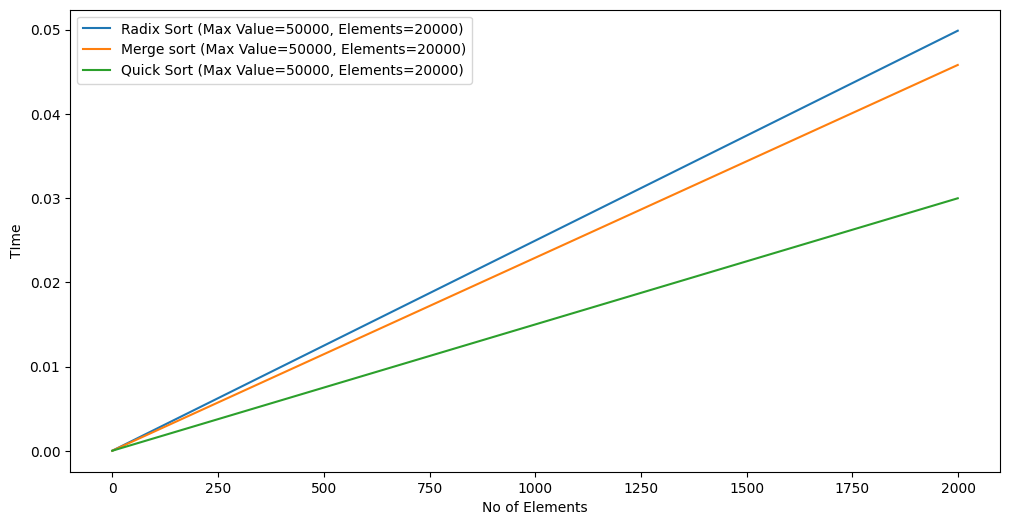

In [137]:
if __name__ == '__main__':
    import numpy as np
    import matplotlib.pyplot as plt
    # fig,axes = plt.subplots(1, 3, figsize=(12,6))
    # axes[0].plot(timelist1)
    # axes[1].plot(timelist2)
    # axes[2].plot(timelist3)
    plt.figure(figsize=(12,6))
    plt.plot(np.linspace(0, s0.runtime, cap//10, dtype = float), label='Radix Sort (Max Value='+str(max_range)+', Elements='+str(cap)+')')
    plt.plot(np.linspace(0, s1.runtime, cap//10, dtype = float), label='Merge sort (Max Value='+str(max_range)+', Elements='+str(cap)+')')
    plt.plot(np.linspace(0, s2.runtime, cap//10, dtype = float), label='Quick Sort (Max Value='+str(max_range)+', Elements='+str(cap)+')')
    plt.xlabel('No of Elements')
    plt.ylabel('TIme')
    plt.legend()